# **Not an ideal network**

###Install Keras framework (use -q option to do a quiet install) and import keras 

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


###Import other necessary libraries / modules 

Import numpy library for array/ matrix operations 

Import Sequential Model from keras/models for building the model 

Import Convolution2D from keras/layers for convolution operation 

Import np_utils module from keras/utils for numpy related helper functions 

Import mnist dataset containing hand-written digits images from keras.datasets 

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

###load Training and Test data from MNIST dataset 

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


###print the shape of training data and also inspect the first image using matplotlib 

(60000, 28, 28)


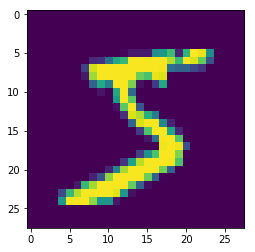

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### Reshape the training and test dataset to include the channel information.In this case it is a greyscale image and so there is 1 channel . the image data was read in as a 28x28 numpy array and is now reshaped to 28x28x1 

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Cast training data as float32 and normalize/re-scale the values such that they are between 0 and 1 instead of 0 and 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

###inspect the first 10 training class labels . They will be some number between 0 and 9 representing the hand-written digit in the corresponding Training data. Each of 0 to 9 represents a class 

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### One hot encoding of training and test class labels : Convert 1-dimensional class arrays to 10-dimensional class matrices 

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

###inspect the first 10 training class labels again after one hot encoding

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Define the model /network 

In [10]:
from keras.layers import Activation, MaxPooling2D

# instantiate a sequential model
model = Sequential()  

# add the first convolution layer - 32 numbers of 3x3 filters , with ReLU activation function . 
#This layer sees the input image of 28x28 x 1 channel .  
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) 

# Now the global receptive field is 3 x 3 

# second convolution layer - 64 filters of shape  3x3x32 . ReLU activation .
#input from previous layer is 26 x 26 x 32 . 
model.add(Convolution2D(64, 3, 3, activation='relu'))

#Global receptive field is 5x5

# Add convolution layer - 128 filters of shape  3x3x64 . ReLU activation.
#input from previous layer is 24 x 24 x 64 . 
model.add(Convolution2D(128, 3, 3, activation='relu'))

#Global receptive field is 7x7

# Perform 2x2 max pooling  . 
#Input from previous layer is 22 x 22 X 128 
model.add(MaxPooling2D(pool_size=(2, 2)))

# After max pooling , dimensions reduce by half , i.e they become 11 x 11 . 
# Maxpooling doubles receptive field . So global receptive field after max pooling is 14 x 14

# Add convolution layer - 256 filters of shape 3x3x128 . ReLU activation.
#input from max pooling operation is 11 x 11 x 128 .  
model.add(Convolution2D(256, 3, 3, activation='relu'))

#Global receptive field is now 16 x 16 

# Add convolution layer - 512 filters of shape 3x3x256 . ReLU activation.
#input coming from previous layer is 9 x 9 x 256 . 
model.add(Convolution2D(512, 3, 3, activation='relu'))

#  Global receptive field is now 18 x 18 

# Add convolution layer - 1024 filters of shape 3x3x512 . ReLU activation.
#input coming from previous layer is 7 x 7 x 512 .
model.add(Convolution2D(1024, 3, 3, activation='relu'))

#Global receptive field is now 20 x 20 

# Add convolution layer - 2048 filters of shape 3x3x1024 . ReLU activation.
#input coming from previous layer is 5 x 5 x 1024 .
model.add(Convolution2D(2048, 3, 3, activation='relu'))

#Global receptive field is now 22 x 22 

# Add convolution layer - 10 filters of shape 3x3x2048 . ReLU activation.
#input coming from previous layer is 3 x 3 x 2048 .
model.add(Convolution2D(10, 3, 3, activation='relu'))

#Global receptive field is now 24 x 24 


#Flatten the 1 x 1 x 10 output from previous layer to a single dimension
model.add(Flatten())

#add softmax activation to output probabilities for each class 
model.add(Activation('softmax'))

#output a summary of the model 
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3),

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

### compile the model using 'Categorical_crossentropy' loss function and 'Adam' optimizer. Also capture 'accuracy' metric for this model as it is trained 

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### train the model on training dataset for 10 epochs with a batch size of 32 

In [12]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 119s 2ms/step - loss: 2.3027 - acc: 0.0988
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - a

### evaluate the model on the test dataset 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

### print the evaluation score - loss  and accuracy 

In [14]:
print(score)

[2.3025851249694824, 0.098]


### perform a prediction on test dataset 

In [0]:
y_pred = model.predict(X_test)

###print the predicted probabilities from model and actual class for the first 9 images in test dataset 

In [16]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


##Observations about the network

As we can see above, the model is predicting equal probabilities for all classes irrespective of the image being classified . So if it were to classify all images as 0 , it will probably get the answer correct about 1/10 th of the times which is what we may be seeing here as 9.8% accuracy . The above values in y_pred  also means that the input to softmax is all zeros resulting in the equal probablities of 0.1 for all classes . 

**Huge number of filters/feature maps**  :  The network has an enormous number of filters /feature maps for an image size that is relatively very small . This overkill is probably causing the network to not learn and get stuck at a low accuracy. **Reducing the number of filters to 32 would allow the network to train properly** . 

Relu in last Conv layer : Use of 'ReLU' activation  layer 'conv2d_8' may also not be allowing negative values to move forward to the next layer as ReLU replaces negative values with zero and keeps only the positive values . Removing 'ReLU' from layer 'conv2d_8' may allow the network to train towards higher accuracies . Then again using lesser filters / feature maps to fix the issue in this network may be a better option 

Use of Flatten: Use of Flatten is not ideal and it is always bettwr to use Global average pooling in order to prepare the input for softmax activation 

Global Receptive field : If we were to build an idela model , the global receptive field of the network should be equal to at least the size of the whole image (or at least big enogh to see the whole of the objet we are trying to identify ) or more . Here the receptive field is 24 x24 . This may not be the biggest problem here since most of the images seem to be centered and do not extend until the edge of the image . 